In [32]:
import numpy as np, pandas as pd
%matplotlib inline

In [2]:
def bootstrap_resample(X, n=None):
    if n == None:
        n = len(X)
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

In [17]:
X = pd.read_csv("ds-boot-2.csv",delimiter=",")
X=X.values
Y1=X[:,1:30]
col=range(0,31)
col.remove(29)
Y2=X[:,col]
col=range(0,32)
col.remove(29)
col.remove(30)
Y3=X[:,col]
col=range(0,33)
col.remove(29)
col.remove(30)
col.remove(31)
Y4=X[:,col]
col=range(0,34)
col.remove(29)
col.remove(30)
col.remove(31)
col.remove(32)
Y5=X[:,col]

Y1_resample = bootstrap_resample(Y1, n=1000)
print 'original mean:', Y1.mean()
print 'resampled mean:', Y1_resample.mean()
print 'original median:', np.median(Y1)
print 'resampled median:', np.median(Y1_resample)

Y2_resample = bootstrap_resample(Y2, n=1000)
print 'original mean:', Y2.mean()
print 'resampled mean:', Y2_resample.mean()
print 'original median:', np.median(Y2)
print 'resampled median:', np.median(Y2_resample)

Y3_resample = bootstrap_resample(Y3, n=1000)
print 'original mean:', Y3.mean()
print 'resampled mean:', Y3_resample.mean()
print 'original median:', np.median(Y3)
print 'resampled median:', np.median(Y3_resample)

Y4_resample = bootstrap_resample(Y4, n=1000)
print 'original mean:', Y4.mean()
print 'resampled mean:', Y4_resample.mean()
print 'original median:', np.median(Y4)
print 'resampled median:', np.median(Y4_resample)

Y5_resample = bootstrap_resample(Y5, n=1000)
print 'original mean:', Y5.mean()
print 'resampled mean:', Y5_resample.mean()
print 'original median:', np.median(Y5)
print 'resampled median:', np.median(Y5_resample)

original mean: 5.63741839655
resampled mean: 5.68150186828
original median: 7.0
resampled median: 7.0
original mean: 18.1080461167
resampled mean: 18.1763140543
original median: 7.16667
resampled median: 7.16667
original mean: 18.1680377833
resampled mean: 18.202756466
original median: 7.316665
resampled median: 7.33333
original mean: 17.9754211167
resampled mean: 17.5450732437
original median: 7.0
resampled median: 7.0
original mean: 18.11232945
resampled mean: 17.712791471
original median: 7.125
resampled median: 7.0


0.976402376244
0.978439024541
0.997436774352
0.986130162711
0.992845212453


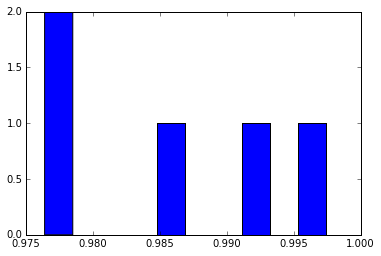

95.0 confidence interval 97.7% and 99.7%


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import pyplot
clf=LinearRegression()
train=[Y1_resample,Y2_resample,Y3_resample,Y4_resample,Y5_resample]
test=[Y1,Y2,Y3,Y4,Y5]
stats=[]
for i in range(0,5):
    clf.fit(train[i][:,:-1],train[i][:,-1])
    pred=clf.predict(test[i][:,:-1])
    score = r2_score(test[i][:,-1], pred)
    print(score)
    stats.append(score)

pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

    

In [31]:
###Exp2###

In [35]:
X = pd.read_csv("ds-boot-1.csv",delimiter=",")
X=X.values
B=X[:,1]
B_resample = bootstrap_resample(B, n=5000)
print 'original mean:', B.mean()
print 'resampled mean:', B_resample.mean()

original mean: 4.21250941974
resampled mean: 4.1502
